In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [21]:
df=pd.read_csv("Dataset1.csv")
# filling missing data
column_names=df.columns 
for a in column_names:
    df[a]=df[a].replace('?', np.NaN)    
df= df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [22]:
num_data = df.select_dtypes(include=['int64'])
cat_data = df.select_dtypes(include=['object'])

num_columns = num_data.columns
cat_columns = cat_data.columns

print("Numerical Vaiables: ", num_columns)
print("Categorical Vaiables: ", cat_columns)

Numerical Vaiables:  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical Vaiables:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [23]:
# for c in df.columns:
#     print ("---- %s ---" % c)
#     print (df[c].value_counts())

In [24]:
def age_group(x):
    x = int(x)
    if( 0 < x < 20 ):
        return "<20"
    elif( 20 < x < 31 ):
        return "19-30"
    elif( 30 < x < 41 ):
        return "31-40"
    elif( 40 < x < 51 ):
        return "41-50"
    elif( 50 < x < 61 ):
        return "51-60"
    elif( 60 < x < 71 ):
        return "61-70"
    else:
        return ">70"

In [25]:
def fnlwgt(x):
    x = int(x)
    if(  x < 100001 ):
        return "low"
    elif( 100001 < x < 300001 ):
        return "low_med"
    elif( 300001 < x < 500000 ):
        return "high_med"
    else:
        return "high"

In [26]:
def capital_gain(x):
    x = int(x)
    if(  x > 0 ):
        return "yes"
    else:
        return "no"

In [27]:
def capital_loss(x):
    x = int(x)
    if(  x > 0 ):
        return "yes"
    else:
        return "no"

In [28]:
def hours_per_week(x):
    x = int(x)
    if( x > 60 ):
        return "too much"
    elif ( x > 40 ):
        return "much"
    elif ( x > 20 ):
        return "normal"
    else:
        return "low"

In [29]:
def pre_processing (df):
    df['age-group'] = df['age'].apply(age_group)
    df['fnlwgt-group'] = df['fnlwgt'].apply(fnlwgt)    
    df['capital-gain-group'] = df['capital-gain'].apply(capital_gain) 
    df['capital-loss-group'] = df['capital-loss'].apply(capital_loss) 
    df['hours-per-week-group'] = df['hours-per-week'].apply(hours_per_week) 
    
    df = df.drop(['age'], axis = 1)
    df = df.drop(['fnlwgt'], axis = 1)
    df = df.drop(['hours-per-week'], axis = 1)
    df = df.drop(['capital-gain'], axis = 1)
    df = df.drop(['capital-loss'], axis = 1)
    df = df.drop(['education-num'], axis = 1)
    df =df.replace(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], ['not married', 'married', 'divorced',
       'married', 'not married', 'married',
       'not married'])
    return df               

In [30]:
def mapping(df , flag):
    df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
    df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
    df['marital-status'] = df['marital-status'].map({'married': 0, 'not married': 1, 'divorced': 2}).astype(int)
    df['workclass']= df['workclass'].map({'Private': 0, 'Self-emp-not-inc': 1,'Local-gov': 2, 'State-gov': 3, 'Self-emp-inc': 4,
                                          'Federal-gov': 5, 'Without-pay': 6, 'Never-worked':7}).astype(int)
    df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,
                                                 'Husband': 4,'Own-child': 5}).astype(int)
    df['education']= df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4,
                                          '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9,
                                          'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13, 'Assoc-voc': 14, 
                                          '9th': 15}).astype(int)
    df['occupation'] = df['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
                                              'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,
                                             'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 
                                             'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)
    if flag == 0:
        df['income'] = df['income'] .map({'<=50K': 0, '>50K': 1}).astype(int)  
    df['fnlwgt-group'] = df['fnlwgt-group'].map({'low_med': 0, 'low': 1,'high_med': 2, 'high': 3}).astype(int)

    df['capital-gain-group'] = df['capital-gain-group'] .map({'yes': 0, 'no': 1}).astype(int)
    df['capital-loss-group'] = df['capital-loss-group'] .map({'yes': 0, 'no': 1}).astype(int)
    df['hours-per-week-group'] = df['hours-per-week-group'].map({'low': 0, 'normal': 1,'much': 2, 'too much': 3}).astype(int)
    df['age-group']= df['age-group'].map({'31-40': 0, '19-30': 1, '41-50': 2, '51-60': 3, '61-70': 4, 
                                          '<20': 5, '>70': 6}).astype(int)
    m =df['native-country'].unique()
    for i in range(len(m)-1):
        df = df.replace([m[i+1]],'non_us')
    df['native-country'] = df['native-country'] .map({'United-States': 0, 'non_us': 1}).astype(int)
    return df

In [31]:
df = pre_processing(df)
df = mapping(df , 0)

In [32]:
X = df.drop('income', axis=1)
y = df['income']
# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Desicion Tree using Gini Index
Accuracy is  81.66986564299424


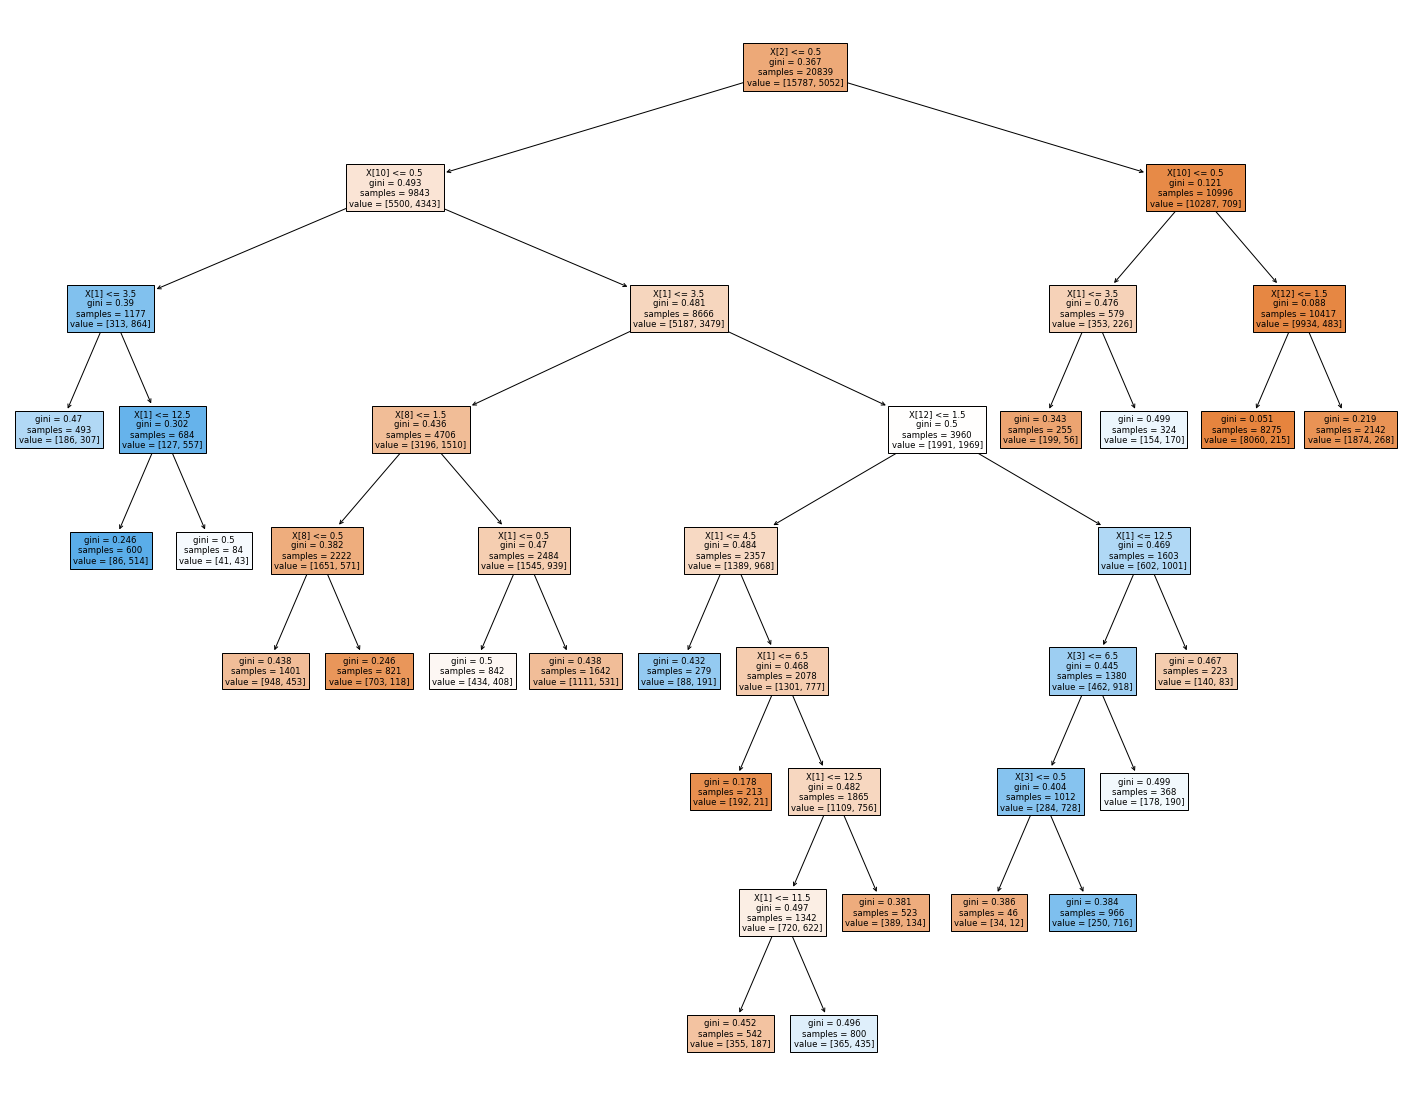

In [33]:
data_clf_gini=DecisionTreeClassifier(criterion='gini', max_depth = 8 , max_leaf_nodes = 20)
data_clf_gini.fit(X_train,y_train)
y_pred=data_clf_gini.predict(X_test)
print("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred)*100)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(data_clf_gini,filled=True)

Desicion Tree using entropy Index
Accuracy is  80.7869481765835


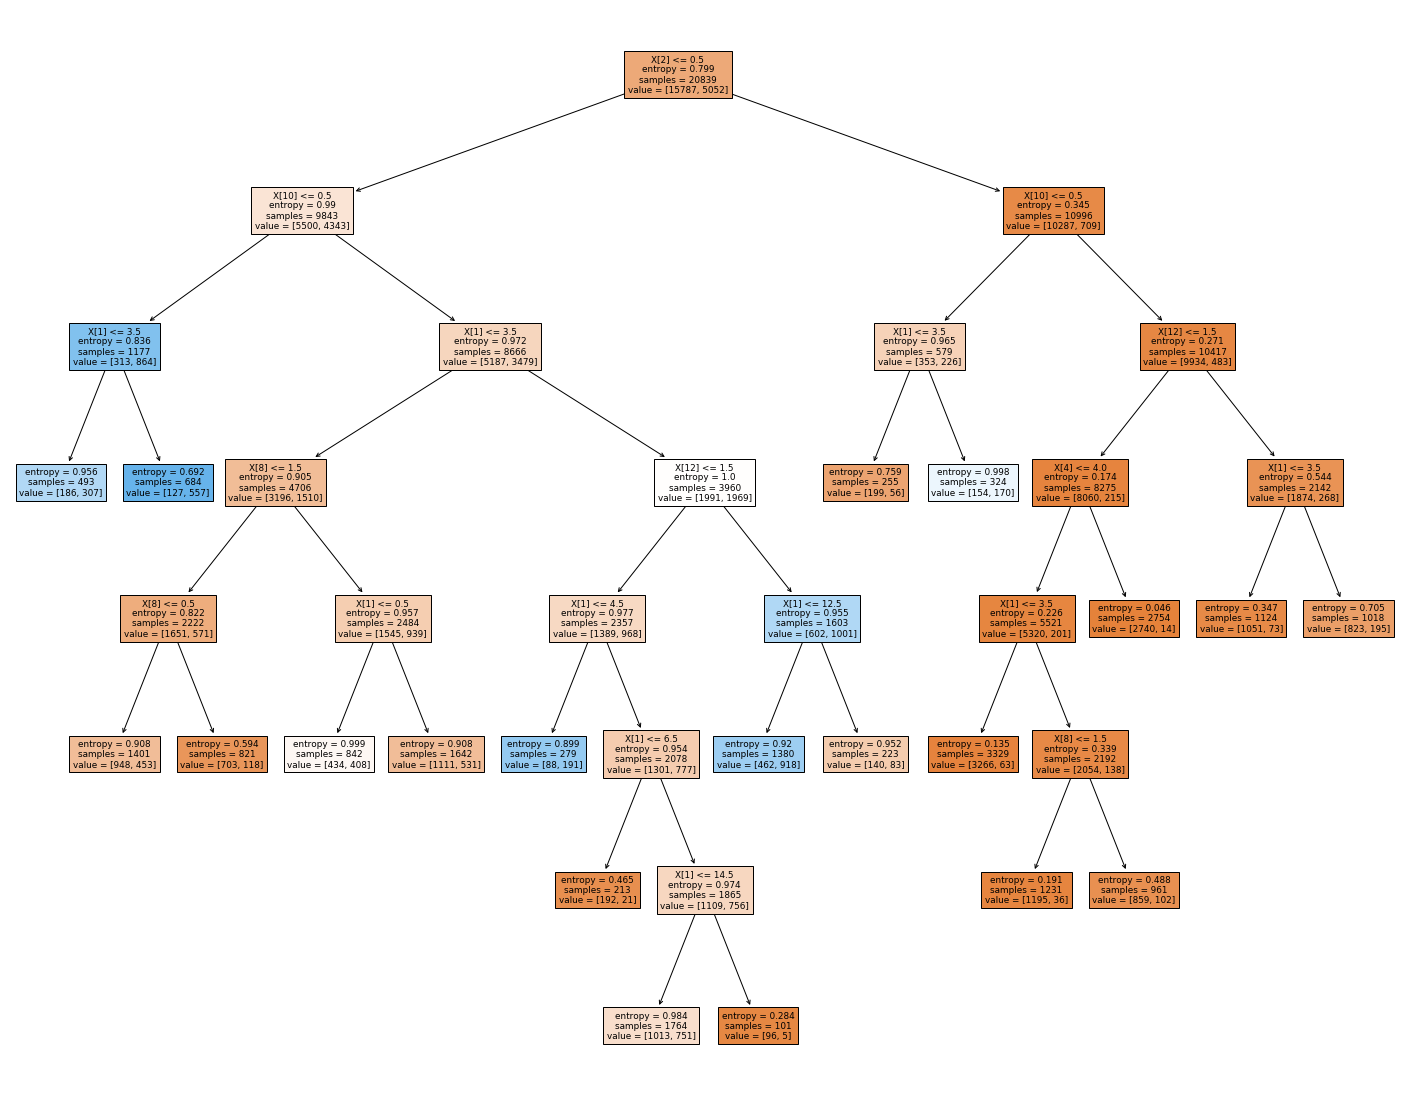

In [34]:
data_clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth = 8, max_leaf_nodes = 20)
data_clf_entropy.fit(X_train,y_train)
y_pred=data_clf_entropy.predict(X_test)
print("Desicion Tree using entropy Index\nAccuracy is ", accuracy_score(y_test,y_pred)*100)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(data_clf_entropy,filled=True)

In [35]:
df_test=pd.read_csv("Dataset1_Unknown.csv")
# filling missing data
column_names=df_test.columns 
for a in column_names:
    df_test[a]=df_test[a].replace('?', np.NaN)
    
df_test= df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [36]:
df_test = pre_processing(df_test)
df_test = mapping(df_test ,1 )

In [37]:
y_pred_test_gini=data_clf_gini.predict(df_test)
y_pred_test_entropy=data_clf_entropy.predict(df_test)

In [46]:
y_predict_gini = []
y_predict_entropy = []
for i in range(len(y_pred_test_gini)):
    if y_pred_test_gini[i] == 0:
        y_predict_gini.append('<=50K')
    else:
        y_predict_gini.append('>50K')
    
    if y_pred_test_entropy[i] == 0:
        y_predict_entropy.append('<=50K')
    else:
        y_predict_entropy.append('>50K')    

        
        
df_gini = pd.DataFrame(y_predict_gini) 
df_entropy = pd.DataFrame(y_predict_entropy)        
df_gini.to_csv('tree_entropy_pre.csv')
df_entropy.to_csv('tree_gini_pre.csv')

np.savetxt("tree_entropy_predict.csv", y_pred_test_entropy, delimiter=",")
np.savetxt("tree_gini_predict.csv", y_pred_test_gini, delimiter=",")